# 2. RandomCandyMachines - First reference strategies and performance metrics

## I. Introduction

### I.1. About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (10/04/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)
- Pandas
- Tqdm

### I.2. Imports and required libraries

This notebook and the RandomCandyMachines files rely on the following libraries:
- Matplotlib (for graphical display of performance graphs)
- Numpy (for array operations)
- Pandas (for displaying tables, listing the parameters of the game)
- Tqdm (for displaying waitbar and progression bars)

We will also import the custom functions and classes from, using the following imports.

In [1]:
from RandomCandyMachineGame import *
from MonteCarloRCM import *

### I.3. Fixing seeds for reproducibility

For reproducibility, we will fix the random seeds of the numpy random variables, as shown below.

In [2]:
from numpy.random import seed as np_seed
random_seed = 8
np_seed(random_seed)

## II. Reference strategies for the Random Candy Machines game

In this notebook, we reuse the Random Candy Machines problem described in the first notebook. We investigate our first three **reference strategies** and introduce some **key metrics** to evaluate the performance of a given strategy/agent.

To do so, we will play the game, by summoning the CandyMachineGame custom objects, and use different types of agents, namely the **'prior_knowledge'**, **'deterministic'** and **'random_naive'** agent types.

The game parameters are fixed as such:
- We have $ N = 10000 $ coins to be played.
- One deterministic candy machine, whose cost is 1 coin, and returns 1 candy every time.
- Four random candy machines, whose costs are 1 coin, and return 2 candies with a success probability of $ p $ and 0 candies with a success probability of $ (1 - p) $.
- The winning probabilities p of the random candy machines, are drawn from a uniform [0,1] random variable.

In [3]:
playable_money = 10000
number_of_deterministic_machines = 1
number_of_random_machines = 5
machines_cost = 1
return_prices_for_deterministic_machines = 1
return_prices_for_random_machines_win = 2
return_prices_for_random_machines_loss = 0

### II.1. Our benchmark strategy #1: the prior knowledge strategy

For starters, we could wonder what is the **upper bound performance**, i.e. the **maximal number of candies** we could possibly win for a given instance of the game, with deterministic and random machines.

In this first strategy, called the **prior knowledge strategy**, the player is simply using all its coins on the best machine, i.e. the machine that has the best expected return. In the original game, this expected return is an information that would normally not be disclosed to the player, and the player would have to estimate those expected rewards by trying the machines. In this first strategy however, we assume we have a prior knowledge about the machines and their expected returns, and play the machine with the best expected return every time.

To demonstrate how this strategy works, let us first initialize our CandyMachineGame, with the parameters given in the previous section and set the *agent_type* to **'prior_knowledge'**.

In [4]:
# Initialize a CandyMachineGame, with PriorKnowledgeAgent
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'prior_knowledge', \
                       random_seed = random_seed)

As mentionned in the previous notebook, we can use the *display_machines_list()* method to display the machines, which can be used in this instance of the game.
As can be seen below, the machine with the best expected return (i.e. the highest expected number of candies, which can be obtained for each coin used) is machine #3, which returns $ 1.937081 $ candies on average for each coin used.

In [5]:
cmg.display_machines_list()

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  


Using the *play()* method, our 'prior_knowledge' agent will play machine #3 every single time, as can be seen with the *display_machines_time_played()* method from the agent attribute of our game.

In [6]:
cmg.play()

Playing 10000 coins with agent prior_knowledge: 100%|███████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 45016.64it/s]


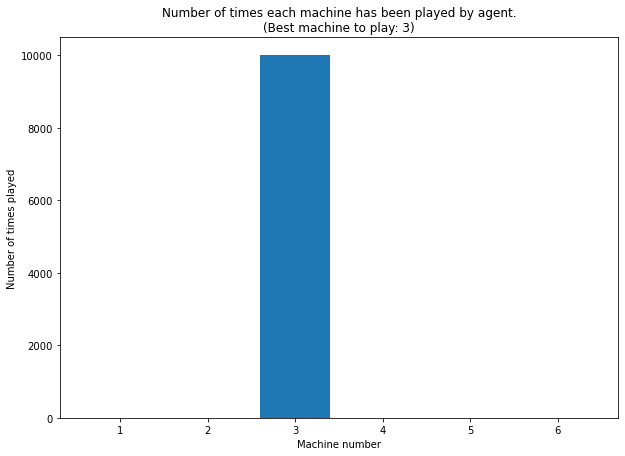

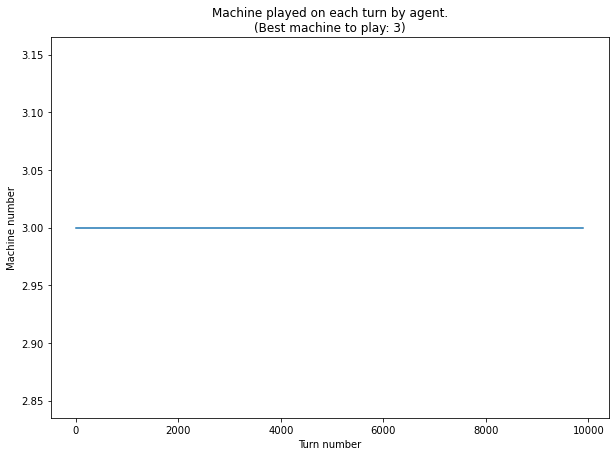

In [7]:
cmg.agent.display_machines_time_played()

As mentionned earlier, this strategy defines the **upper bound performance** for the given instance of the RandomCandyMachineGame game.

Below, we display two graphs, obtained thanks to the *display_performance_over_time()* method, which showcase the average outcome of the *prior_knowledge* agent over time (in blue), and the upper bound performance one can expect from our game (the $ 1.937081 $ defined earlier).

As expected, the **outcome** over time for our prior_knowledge agent closely matches with the upper bound performance.

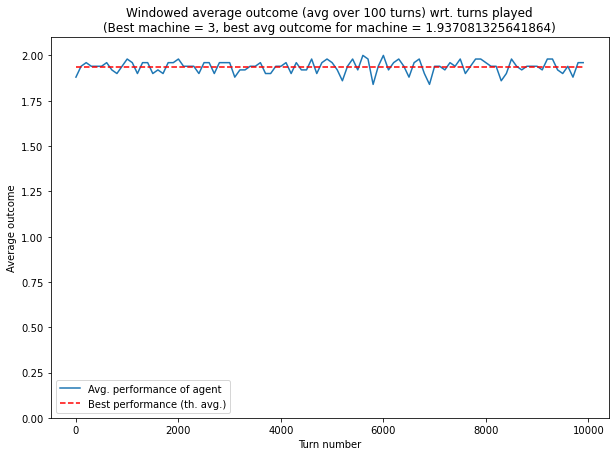

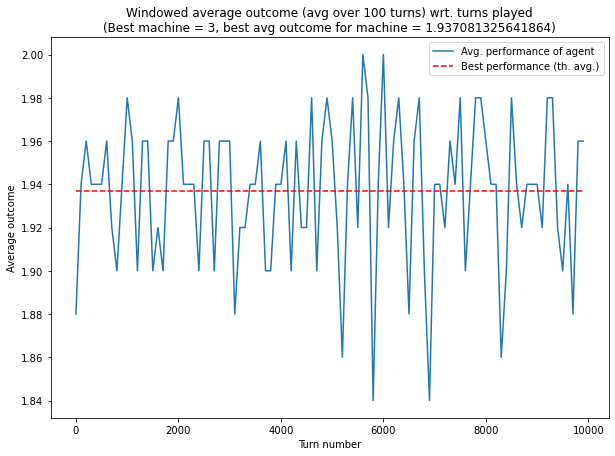

In [8]:
cmg.agent.display_performance_over_time()

Another interesting performance metric is the **regret** metric, which is defined as the **difference** between the **outcome** obtained by playing a machine on turn $ t $ and the **average expected outcome for the best machine** (here, $ 1.937081 $).

In layman terms, the **regret** corresponds to **the number of candies we have lost by playing the machine on turn $ t $, compared to what we could have obtained if we had played the best machine**.

The *display_regret_over_time()*, shows the windowed average over time of the regret for our given agent, which, as expected, should be close to 0, as we are always playing the best machine.

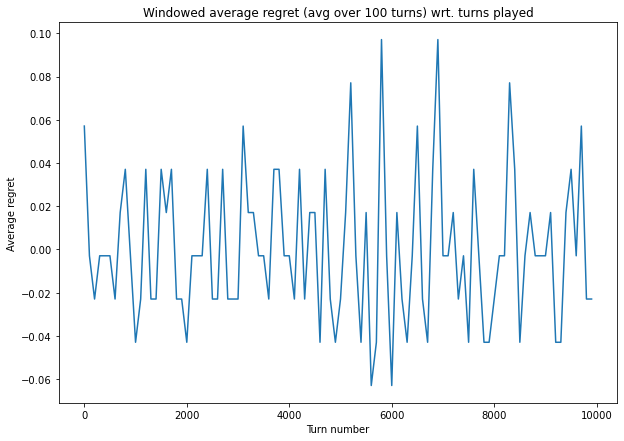

In [9]:
cmg.agent.display_regret_over_time()

Finally, let us store in *prior_knowledge_avg* and *prior_knowledge_avg_reg*, the average outcome performance (number of candies obtained divided by total number of coins played) and the average regret performance (number of candies missed, divided by total number of coins played).

As expected, the *prior_knowledge_avg* is close to the best expected return (i.e. $ 1.937081 $) and the *prior_knowledge_avg_reg* is close to zero.

In [10]:
prior_knowledge_avg = cmg.agent.compute_agent_outcome()/playable_money
print(prior_knowledge_avg)

1.9372


In [11]:
prior_knowledge_avg_reg = cmg.agent.compute_agent_regret()/playable_money
print(prior_knowledge_avg_reg)

-0.00011867435813613893


### II.2. Our benchmark strategy #2: the deterministic strategy

A second reference strategy, called the **'deterministic'** strategy, consists of playing the deterministic machine with the highest expected return every single time. This is an interesting strategy, corresponding to a player that refuses to play its coins on random machines, and instead goes for a "defensive" strategy, with guaranteed rewards using the deterministic candy machines only.

As before, let us initialize our CandyMachineGame, with the parameters given in the previous section and set the *agent_type* to **'deterministic'**. Because the seed *random_seed = random_seed* is fixed, the machines will have the same expected returns as before.

In [12]:
# Initialize a CandyMachineGame, with DeterministicAgent
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'deterministic', \
                       random_seed = random_seed)

In [13]:
cmg.display_machines_list()

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  


As before, we can use the *play()* method, to see how this strategy performs. As expected, this strategy always plays the machine #1, as it is the only (and therefore the best) deterministic machine available in the game.

In [14]:
cmg.play()

Playing 10000 coins with agent deterministic: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 244570.11it/s]


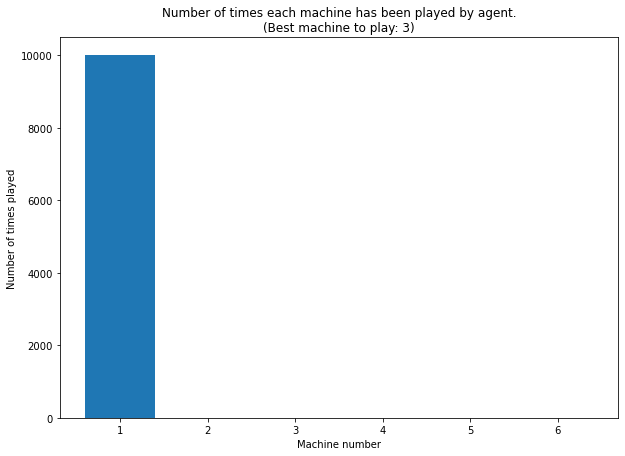

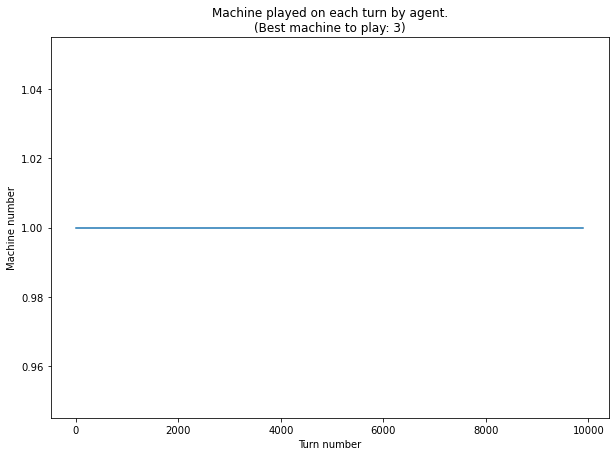

In [15]:
cmg.agent.display_machines_time_played()

The performance over time, in terms of outcome is constant and equal to 1, which is the expected (fixed) return for the deterministic machine #1. This performance, displayed in blue, is however pretty far away from the upper bound, in red, corresponding to the average number of candies we would have obtained if we had played the best machine (i.e. machine #3) instead.

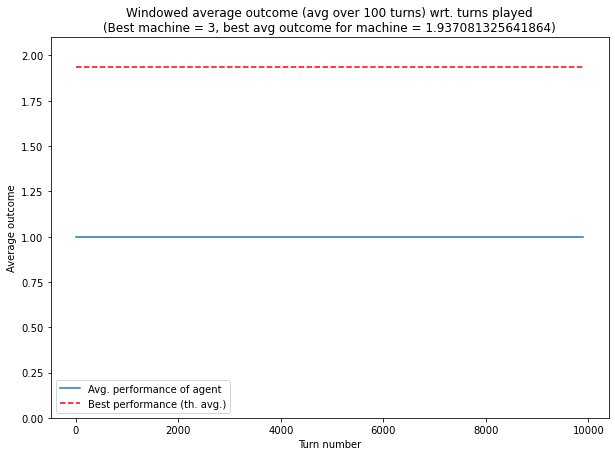

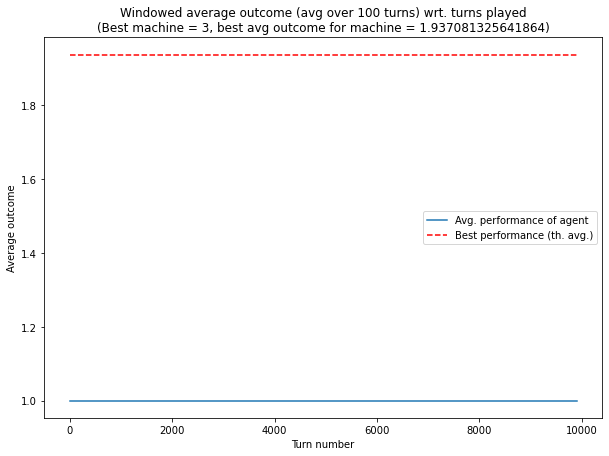

In [16]:
cmg.agent.display_performance_over_time()

As mentioned earlier in the previous section, we can define the strategy performance in terms of **regret**, i.e. the number of candies we missed, by playing this strategy compared to what we would have obtained if we had played the best machine every time. In our case, the regret over time is constant, and simply equal to the difference between the expected outcome for the best machine ($ 1.937081 $) and the outcome of the deterministic machine #1 (1.0), i.e. $ 0.937081 $. 

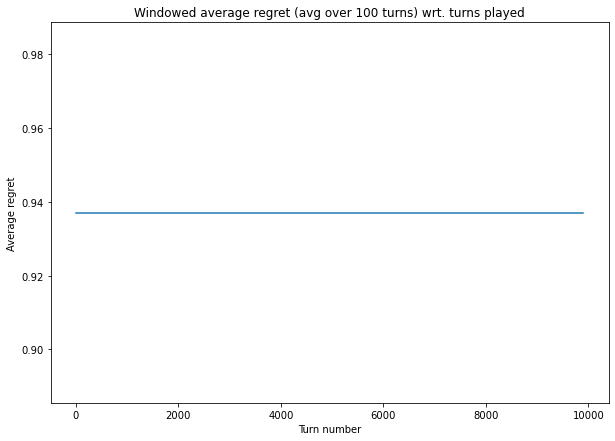

In [17]:
cmg.agent.display_regret_over_time()

The average performance of this strategy is, as expected, $ 1.0 $. And the average regret is simply $ 0.937081 $. While this strategy is obviously missing on large possible gains, as is indicated by the regret value, it is intersting as it defines a first **lower performance bound** for the strategies we could implement.

In [18]:
deterministic_avg = cmg.agent.compute_agent_outcome()/playable_money
print(deterministic_avg)

1.0


In [19]:
deterministic_avg_reg = cmg.agent.compute_agent_regret()/playable_money
print(deterministic_avg_reg)

0.9370813256417693


### III.3. Our benchmark strategy #3: the naive random strategy

One last reference strategy consists of the naive random strategy. In this strategy, the player decides on a machine to play randomly, following a **uniform random variable**. In our case, this can be simply obtained by rolling a dice at the beginning of every turn, and playing the machine indicated by the dice. While it seems very naive and risky, this strategy is interesting as it "tries" and plays all the machines at random.

As before, let us initialize our CandyMachineGame, with the parameters given in the previous section and set the *agent_type* to **'random_naive'**. We then play the game using this strategy, using the *play()* method, as before.

In [20]:
# Initialize a CandyMachineGame, with RandomAgent
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'random_naive', \
                       random_seed = random_seed)
cmg.describe()

{'agent_random_seed': None, 'random_seed': 8, 'playable_money': 10000, 'initial_money': 10000, 'machines_cost': 1, 'number_of_deterministic_machines': 1, 'number_of_random_machines': 5, 'total_number_of_machines': 6, 'random_parameters': [0.8734294027918162, 0.968540662820932, 0.86919454021392, 0.530855691555599, 0.2327283279772907], 'return_prices_for_deterministic_machines': 1, 'return_prices_for_random_machines_win': 2, 'return_prices_for_random_machines_loss': 0, 'list_of_machines': [<CandyMachines.DeterministicCandyMachine object at 0x00000223D50C7490>, <CandyMachines.RandomCandyMachine object at 0x00000223D50C7670>, <CandyMachines.RandomCandyMachine object at 0x00000223D50C7A00>, <CandyMachines.RandomCandyMachine object at 0x00000223D50C7BE0>, <CandyMachines.RandomCandyMachine object at 0x00000223D50C7C40>, <CandyMachines.RandomCandyMachine object at 0x00000223D50C7730>], 'display_bool': True, 'agent_type': 'random_naive', 'agent_parameters': None, 'agent': <CandyAgents.RandomAge

In [21]:
cmg.play()

Playing 10000 coins with agent random: 100%|███████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 130219.07it/s]


In [22]:
cmg.display_machines_list()
print("\nEstimates for the expected rewards of machines:\n", cmg.agent.machine_estimates)

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  

Estimates for the expected rewards of machines:
 {1: 1.0, 2: 1.7539489671931956, 3: 1.9251048532055124, 4: 1.7367104440275172, 5: 1.1155401502021929, 6: 0.47411285631180905}


As expected, this strategy plays the machines roughly the same number of times, assuming the dice used for deciding on which machine we should be playing is balanced.

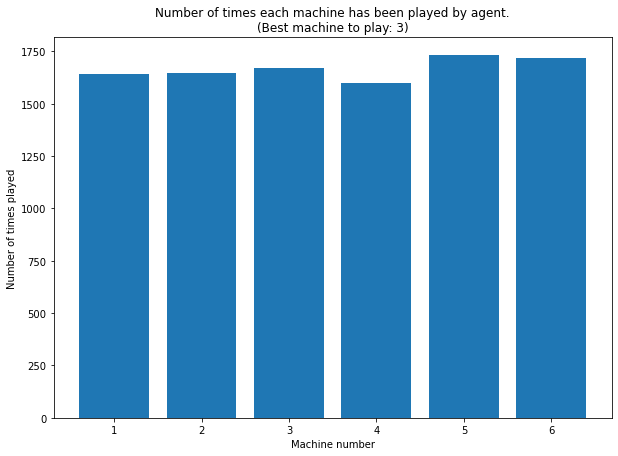

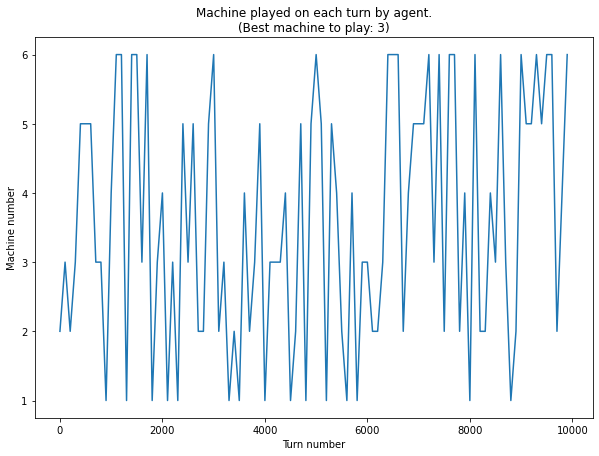

In [23]:
cmg.agent.display_machines_time_played()

The outcome and regret performance metrics are roughly constant over time, as expected.

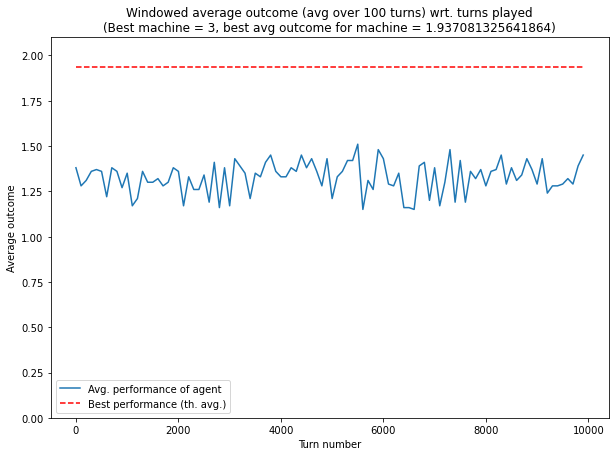

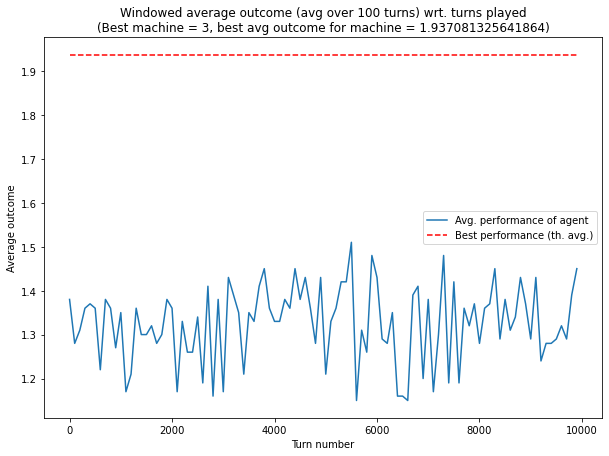

In [24]:
cmg.agent.display_performance_over_time()

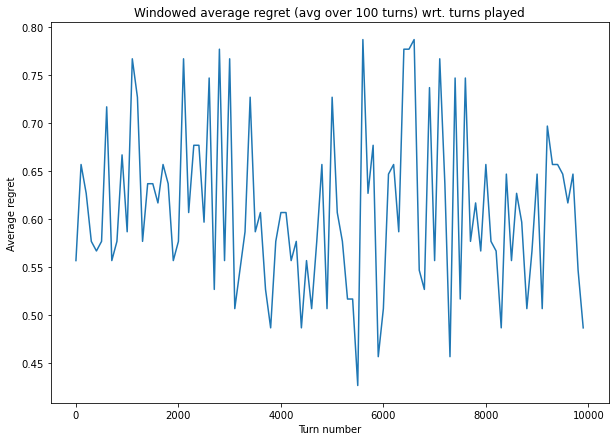

In [25]:
cmg.agent.display_regret_over_time()

The average outcome is higher than the the **'deterministic'**, but this is only due to the fact that the expected returns for the random machines in this instance of the game (with random_seed = 8) were rather good on average. 

In [26]:
naive_random_avg = cmg.agent.compute_agent_outcome()/playable_money
print(naive_random_avg)

1.3259


In [27]:
naive_random_avg_reg = cmg.agent.compute_agent_regret()/playable_money
print(naive_random_avg_reg)

0.6111813256418831


On a different seed value (as shown below with random_seed = 11), the average outcome may greatly vary and fall below the 1.0 average performance of the **'deterministic'** strategy. This is mostly due to the fact that the random machines, with random_seed = 11, have rather low expected returns, compared to the ones obtained with random_seed = 8.

In [28]:
random_seed = 11
cmg2 = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'random_naive', \
                       random_seed = random_seed)
cmg2.play()

Playing 10000 coins with agent random: 100%|███████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 127983.60it/s]


In [29]:
cmg2.display_machines_list()
print("\nEstimates for the expected rewards of machines:\n", cmg2.agent.machine_estimates)

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0         0.18027   
2              3         random    1          2           0       0.0194752   
3              4         random    1          2           0        0.463219   
4              5         random    1          2           0        0.724934   
5              6         random    1          2           0        0.420204   

   Expected_return  
0         1.000000  
1         0.360539  
2         0.038950  
3         0.926437  
4         1.449868  
5         0.840407  

Estimates for the expected rewards of machines:
 {1: 1.0, 2: 0.3577764636309875, 3: 0.03201396973224681, 4: 0.9107457428068115, 5: 1.4455864570737622, 6: 0.8460598656078192}


In [30]:
naive_random_avg2 = cmg2.agent.compute_agent_outcome()/playable_money
print(naive_random_avg2)

0.7584


In [31]:
naive_random_avg_reg2 = cmg2.agent.compute_agent_regret()/playable_money
print(naive_random_avg_reg2)

0.6914678583841641


## III. Performance comparison of strategies

### III.1. Single run performance comparison of strategies (outcome and regret)

As a recap, we display below the average performance metrics for all three reference strategies, for a single run (with random_seed = 8).

In [32]:
print("Average performance of each strategy (single run)")
print("(Higher is better.)")
print("---")
print("Prior Knowledge: ", prior_knowledge_avg)
print("---")
print("Deterministic: ", deterministic_avg)
print("---")
print("Random (naive): ", naive_random_avg)

Average performance of each strategy (single run)
(Higher is better.)
---
Prior Knowledge:  1.9372
---
Deterministic:  1.0
---
Random (naive):  1.3259


In [33]:
print("Average regret of each strategy (single run)")
print("(Lower is better.)")
print("---")
print("Prior Knowledge: ", prior_knowledge_avg_reg)
print("---")
print("Deterministic: ", deterministic_avg_reg)
print("---")
print("Random (naive): ", naive_random_avg_reg)

Average regret of each strategy (single run)
(Lower is better.)
---
Prior Knowledge:  -0.00011867435813613893
---
Deterministic:  0.9370813256417693
---
Random (naive):  0.6111813256418831


## Monte Carlo Performance

As illustrated in the previous section, the impact of the random_seed is rather important.

In this section, we will play the game several times in a row (in our case, 100 times, as defined by *number_of_monter_carlo_iterations = 100* below), using the three reference strategies we defined earlier, and comparing their performance over these 100 runs.

In [34]:
number_of_monter_carlo_iterations = 100 #10000

To do so, we will define a MonteCarloRCM object, which receives the same game parameters as before, but also receives:
- n_iter: the number of independent times we will play the game, in our case 100.
- agent_list: a list of string consisting of the strategies to be played on each run of the game. In our case, we simply pass the list of the three reference strategies, i.e. **['prior_knowledge', 'deterministic', 'random_naive']**.

In [35]:
mc_rcm = MonteCarloRCM(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       n_iter = number_of_monter_carlo_iterations, \
                       agent_list = ['prior_knowledge', 'deterministic', 'random_naive'], \
                       display_bool = True)

We can then play the game for 100 iterations, using the *run_all_iterations()* method, as shown below. Because we set *display_bool* to *True* in our MonteCarloRCM object, a waitbar will be displayed, showing the progress of our calculations.

In [36]:
mc_rcm.run_all_iterations()

Monte Carlo over 100 iterations: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.14it/s]


We can display the average performance of all three strategies over the 100 iterations of the game. As shown below, we can see that both the **'deterministic'** and **'random_naive'** roughly have the same performance, corresponding to the **lower performance bound** one can expect for all strategies. The **'prior knwledge'** strategy defines the upper performance bound, as the average regret of this strategy is close to zero.

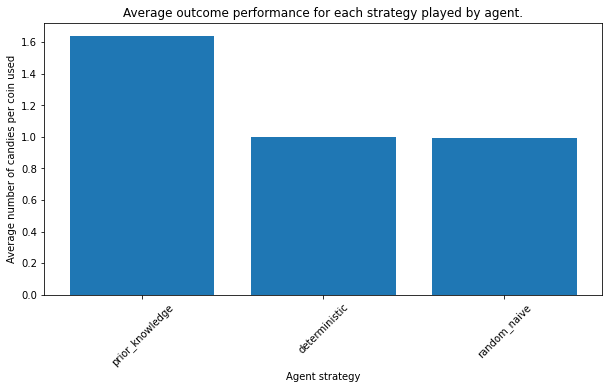

In [37]:
mc_rcm.display_average_performance()

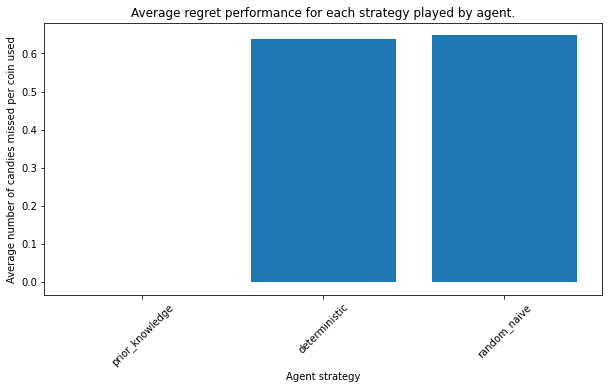

In [38]:
mc_rcm.display_average_regret()

Below, we display histograms showing the distribution of performance metrics for all strategies over all iterations of the game. In order to get nice looking histograms, we are going to run the Monte Carlo simulations over a larger number of iterations (here, 10000). This might take a few minutes to complete.

In [39]:
print("Monte Carlo simulations started for all strategies.")
number_of_monter_carlo_iterations = 10000
mc_rcm = MonteCarloRCM(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       n_iter = number_of_monter_carlo_iterations, \
                       agent_list = ['prior_knowledge', 'deterministic', 'random_naive'], \
                       display_bool = True)
mc_rcm.run_all_iterations()
print("Completed Monte Carlo simulations.")

Monte Carlo over 10000 iterations:   0%|                                                                                   | 1/10000 [00:00<22:46,  7.32it/s]

Monte Carlo simulations started for all strategies.


Monte Carlo over 10000 iterations: 100%|███████████████████████████████████████████████████████████████████████████████| 10000/10000 [22:58<00:00,  7.25it/s]

Completed Monte Carlo simulations.


As expected, the performance of all three strategies resembles to the ones we have observed before when we considered 100 Monte Carlo runs.

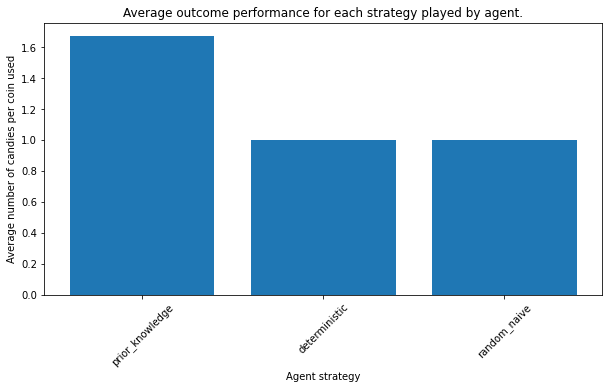

In [40]:
mc_rcm.display_average_performance()

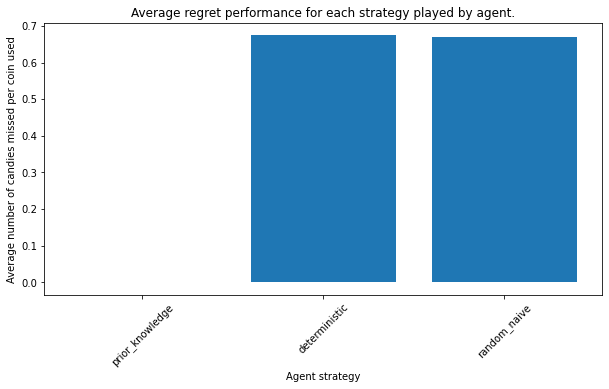

In [41]:
mc_rcm.display_average_regret()

Because we have many more runs, we can display some histograms distributions for the performance and regret metrics over all 10000 Monte Carlo runs.
As expected,
- The deterministic strategy has a constant performance of 1.
- The prior knowledge strategy has a regret close to 0.
- The random naive performance and regret metrics are normally distributed. This can be mathematically proven and follows from the winning probabilities being drawn from a uniform distribution with values in $[0,1]$.
- The random naive and deterministic strategies tend to have the same average performance and regret, once averaged over all 10000 Monte Carlo runs, even though their distributions differ. This again, can be mathematically proven.

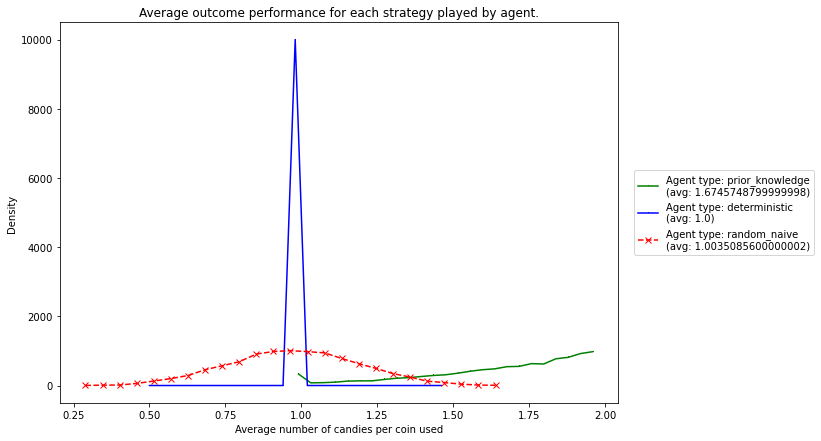

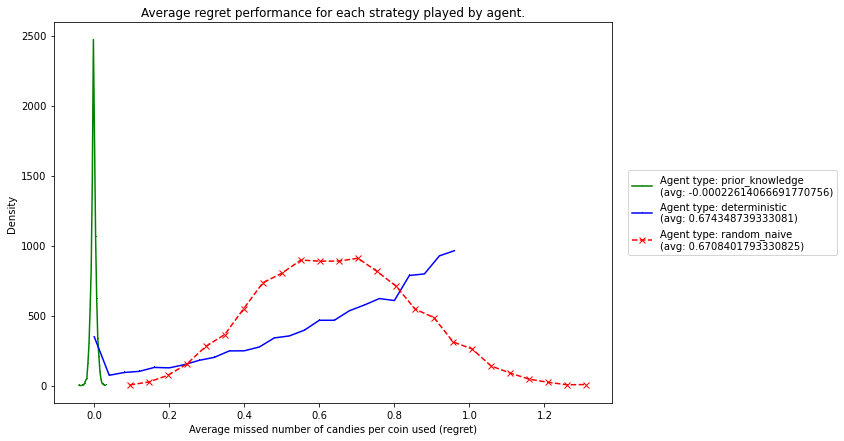

In [42]:
mc_rcm.display_montecarlo_histograms()

Finally, we also provide the average performance metrics (outcome, regret, cumulated outcome and cumulated regret) over time, averaged over the 100 iterations of the game. These graph show that the outcome and regret over time remains roughly constant for all three strategies. This is due to the fact that these strategies are currently unable to learn information about the machines, from the previous tries.

These graphs will come in handy later on, in the next notebooks, once we investigate strategies that are able to learn about the machines winning probabilities over time.

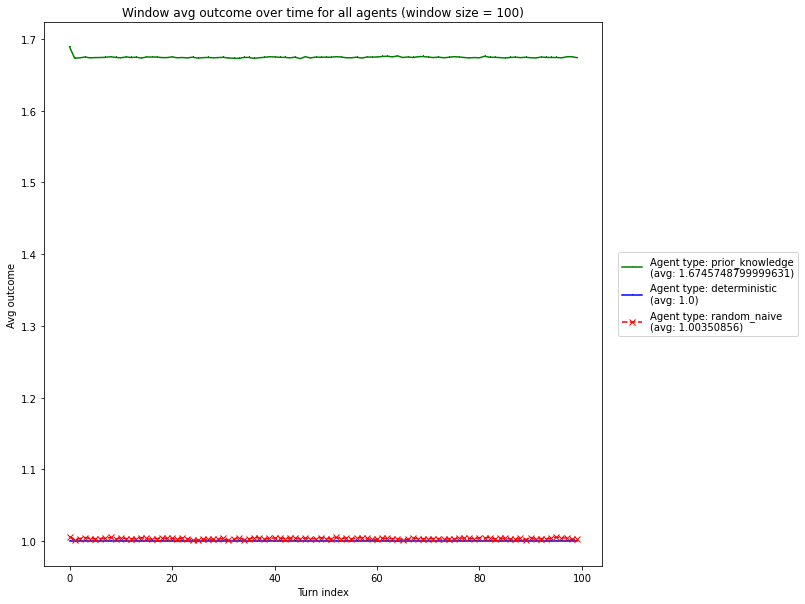

In [43]:
mc_rcm.display_performance_over_time()

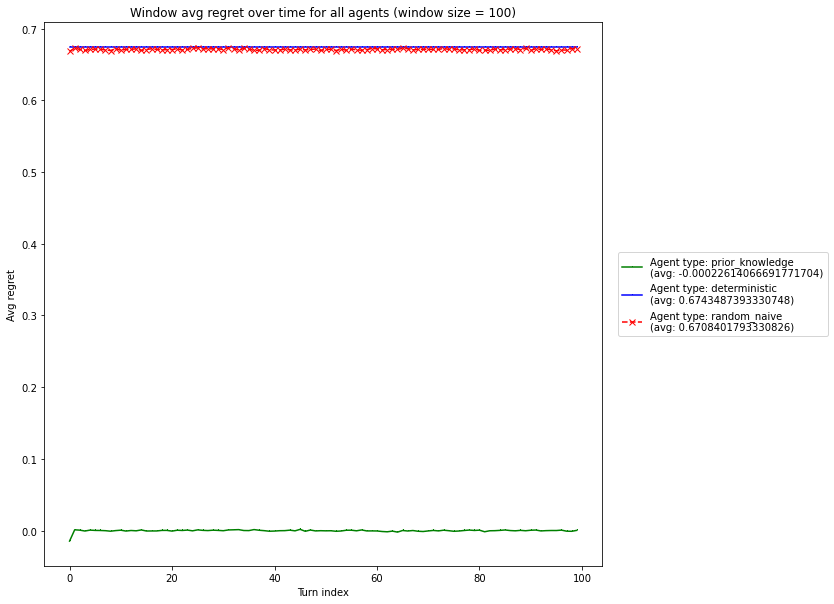

In [44]:
mc_rcm.display_regret_over_time()

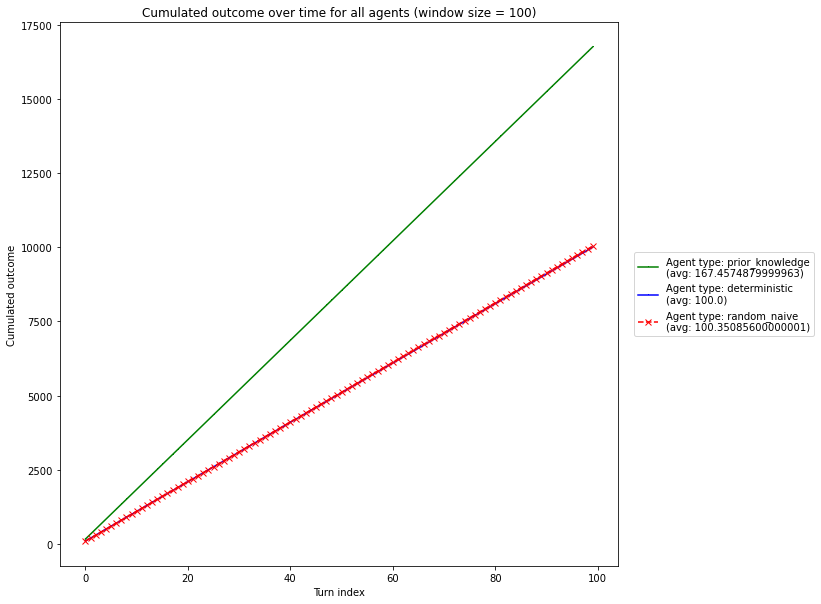

In [45]:
mc_rcm.display_cumulated_performance_over_time()

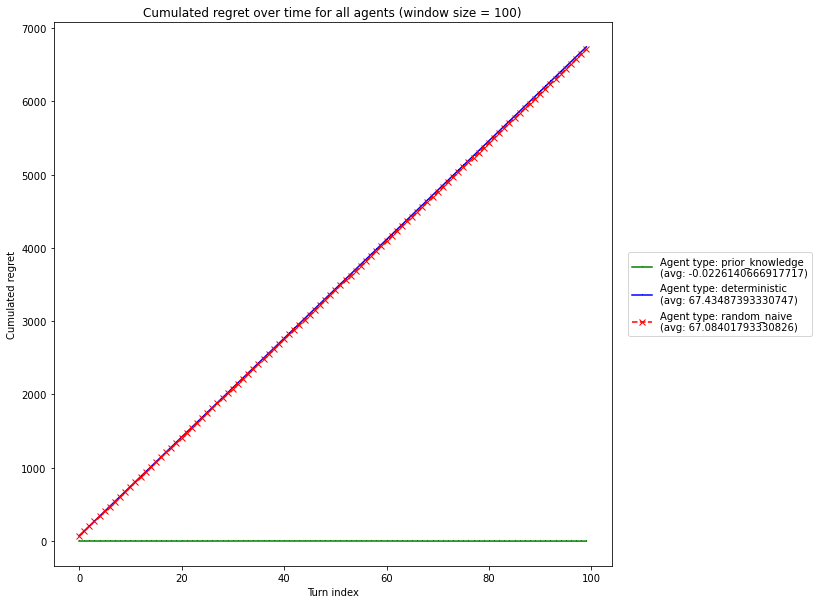

In [46]:
mc_rcm.display_cumulated_regret_over_time()

## III. End of file and what is next

In this notebook, we have introduced our first reference strategies: the best-deterministic, prior-knowledge and random strategies. These strategies define the lower and upper performance bounds in terms of outcome and regret.

In the next notebook, we will focus on designing strategies that will learn and estimate the expected returns of the machines in the game, through trial and error.